# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [4]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

In [32]:
%run  smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

Environment.reset(): Trial set up with start = (4, 7), destination = (2, 4), deadline = 25
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0.95
Environment.act() [POST]: location: (4, 7), heading: (0, -1), action: None, reward: 1.56150894743
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrNNl', 'deadline': 25, 't': 0, 'action': None, 'reward': 1.5615089474346047, 'waypoint': 'left'}
Agent previous state: lrNNl
Agent properly idled at a red light. (rewarded 1.56)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0.95
Environment.act() [POST]: location: (4, 7), heading: (0, -1), action: left, reward: -39.8300834161
Environment.act(): Step 


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0.95
Environment.act() [POST]: location: (6, 7), heading: (0, 1), action: None, reward: 1.59161018392
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrNNN', 'deadline': 11, 't': 14, 'action': None, 'reward': 1.591610183919153, 'waypoint': 'left'}
Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 1.59)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
0.95
Environment.act() [POST]: location: (6, 7), heading: (0, 1), action: left, reward: -9.83843378098
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 2, 'light': 'red', 'state': 'lrNNr', 'deadline': 10, 't': 15, 'action': 'left', 'reward': -9.83843378097636, 'waypoint': 'le

0.9
Environment.act() [POST]: location: (7, 2), heading: (0, -1), action: None, reward: 1.7688105001
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrlNN', 'deadline': 17, 't': 3, 'action': None, 'reward': 1.7688105001044965, 'waypoint': 'left'}
Agent previous state: lrlNN
Agent properly idled at a red light. (rewarded 1.77)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
0.9
Environment.act() [POST]: location: (8, 2), heading: (1, 0), action: right, reward: 0.831989921564
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrlNN', 'deadline': 16, 't': 4, 'action': 'right', 'reward': 0.8319899215643817, 'waypoint': 'left'}
Agent previous state: lrlNN
Agent drove right instead of left. (rewarded 0.83)
75% of

Agent previous state: lgNNf
Agent idled at a green light with no oncoming traffic. (rewarded -5.23)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
0.9
Environment.act() [POST]: location: (6, 5), heading: (0, -1), action: forward, reward: -39.9598044101
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 4, 'light': 'red', 'state': 'lrlNf', 'deadline': 1, 't': 19, 'action': 'forward', 'reward': -39.95980441008708, 'waypoint': 'left'}
Environment.step(): Primary agent ran out of time! Trial aborted.
Agent previous state: lrlNf
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.96)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 3
\-------------------------

Environment.reset(): Trial s


/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0.85
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: forward, reward: -40.9602800744
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 4, 'light': 'red', 'state': 'rrrNf', 'deadline': 12, 't': 13, 'action': 'forward', 'reward': -40.96028007444311, 'waypoint': 'right'}
Agent previous state: rrrNf
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.96)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0.85
Environment.act() [POST]: location: (3, 6), heading: (0, 1), action: right, reward: 1.58146453615
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrrNN', 'deadline'

Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: None, reward: 2.38155692621
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frlNN', 'deadline': 18, 't': 2, 'action': None, 'reward': 2.381556926212771, 'waypoint': 'forward'}
Agent previous state: frlNN
Agent properly idled at a red light. (rewarded 2.38)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
0.8
Environment.act() [POST]: location: (3, 5), heading: (1, 0), action: None, reward: 0.131588586475
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fglNN', 'deadline': 17, 't': 3, 'action': None, 'reward': 0.13158858647546257, 'waypoint': 'forward'}
Agent previous state: fglNN
Agent idled at a green light with oncoming traffic. (re


/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
0.8
Environment.act() [POST]: location: (8, 5), heading: (0, 1), action: right, reward: 0.781242486292
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': 'fgNff', 'deadline': 3, 't': 17, 'action': 'right', 'reward': 0.7812424862923834, 'waypoint': 'forward'}
Agent previous state: fgNff
Agent drove right instead of forward. (rewarded 0.78)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
0.8
Environment.act() [POST]: location: (8, 5), heading: (0, 1), action: left, reward: -39.4261002387
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 4, 'light': 'red', 'state': 'lrNNf', 'deadline': 2, 't': 18, 'action': 'left', 'reward': -39.42610023


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0.75
Environment.act() [POST]: location: (2, 3), heading: (1, 0), action: forward, reward: -9.30438235508
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'frlNN', 'deadline': 9, 't': 11, 'action': 'forward', 'reward': -9.304382355076116, 'waypoint': 'forward'}
Agent previous state: frlNN
Agent attempted driving forward through a red light. (rewarded -9.30)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
0.75
Environment.act() [POST]: location: (2, 4), heading: (0, 1), action: right, reward: 0.260942038231
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frlNN', 'deadline': 8, 't': 12, 'action': 'right', 'reward': 0.2


/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
0.7
Environment.act() [POST]: location: (8, 2), heading: (0, -1), action: right, reward: -20.7602244485
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 3, 'light': 'red', 'state': 'lrffN', 'deadline': 13, 't': 12, 'action': 'right', 'reward': -20.760224448511185, 'waypoint': 'left'}
Agent previous state: lrffN
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.76)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0.7
Environment.act() [POST]: location: (8, 7), heading: (0, -1), action: forward, reward: 1.32062820963
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgfNN', 'deadline': 12, 't': 13

Agent previous state: frlNl
Agent attempted driving forward through a red light. (rewarded -10.62)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
0.65
Environment.act() [POST]: location: (8, 6), heading: (0, -1), action: left, reward: 0.691070896666
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fglNN', 'deadline': 20, 't': 10, 'action': 'left', 'reward': 0.6910708966659695, 'waypoint': 'forward'}
Agent previous state: fglNN
Agent drove left instead of forward. (rewarded 0.69)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0.65
Environment.act() [POST]: location: (8, 6), heading: (0, -1), action: None, reward: 1.48158814744
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': N


/-------------------
| Step 25 Results
\-------------------

Environment.step(): t = 25
0.65
Environment.act() [POST]: location: (8, 5), heading: (1, 0), action: left, reward: -10.0151335646
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 2, 'light': 'red', 'state': 'frNNl', 'deadline': 5, 't': 25, 'action': 'left', 'reward': -10.015133564620477, 'waypoint': 'forward'}
Agent previous state: frNNl
Agent attempted driving left through a red light. (rewarded -10.02)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Environment.step(): t = 26
0.65
Environment.act() [POST]: location: (1, 5), heading: (1, 0), action: forward, reward: 0.782768411957
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': 'fgNlN', 'deadline': 4, 't': 26, 'action': 'forward', 'reward': 0.


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
0.6
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (5, 4), heading: (-1, 0), action: forward, reward: 2.01274193672
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fglNf', 'deadline': 21, 't': 9, 'action': 'forward', 'reward': 2.0127419367224677, 'waypoint': 'forward'}
Agent previous state: fglNf
Agent followed the waypoint forward. (rewarded 2.01)
67% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 9
\-------------------------

Environment.reset(): Trial set up with start = (6, 3), destination = (3, 2), deadline = 20
Simulating trial. . . 
epsilon = 0.5500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0.


/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0.55
Environment.act() [POST]: location: (6, 4), heading: (-1, 0), action: forward, reward: -9.46012729261
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': 'frNll', 'deadline': 7, 't': 13, 'action': 'forward', 'reward': -9.460127292611991, 'waypoint': 'forward'}
Agent previous state: frNll
Agent attempted driving forward through a red light. (rewarded -9.46)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0.55
Environment.act() [POST]: location: (6, 4), heading: (-1, 0), action: None, reward: 1.75222119007
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': 'frllN', 'deadline': 6, 't': 14, 'action': None, 'reward': 1.


/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
0.5
Environment.act() [POST]: location: (1, 4), heading: (0, -1), action: right, reward: 0.475488961824
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': 'fgNfN', 'deadline': 17, 't': 8, 'action': 'right', 'reward': 0.475488961824028, 'waypoint': 'forward'}
Agent previous state: fgNfN
Agent drove right instead of forward. (rewarded 0.48)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
0.5
Environment.act() [POST]: location: (1, 4), heading: (0, -1), action: left, reward: -10.006362841
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'lrNNN', 'deadline': 16, 't': 9, 'action': 'left', 'reward': -10.006362841029288, 'wayp


/-------------------
| Step 23 Results
\-------------------

Environment.step(): t = 23
0.5
Environment.act() [POST]: location: (4, 3), heading: (1, 0), action: None, reward: 1.3265569736
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frNNl', 'deadline': 2, 't': 23, 'action': None, 'reward': 1.3265569736004261, 'waypoint': 'forward'}
Agent previous state: frNNl
Agent properly idled at a red light. (rewarded 1.33)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Environment.step(): t = 24
0.5
Environment.act() [POST]: location: (4, 3), heading: (1, 0), action: None, reward: 1.83789319995
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frlNN', 'deadline': 1, 't': 24, 'action': None, 'reward': 1.8378931999508379, 'waypoint': 'forwa


/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
0.45
Environment.act() [POST]: location: (6, 4), heading: (1, 0), action: forward, reward: 1.80034008755
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgNNN', 'deadline': 13, 't': 12, 'action': 'forward', 'reward': 1.8003400875462015, 'waypoint': 'forward'}
Agent previous state: fgNNN
Agent followed the waypoint forward. (rewarded 1.80)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0.45
Environment.act() [POST]: location: (6, 5), heading: (0, 1), action: right, reward: 0.351304615745
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': 'lrNlN', 'deadline': 12, 't': 13, 'action': 'right', 'reward': 0.351304615745287

Environment.step(): t = 4
0.4
Environment.act() [POST]: location: (4, 6), heading: (0, -1), action: forward, reward: 1.20736851351
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': 'lgNfr', 'deadline': 21, 't': 4, 'action': 'forward', 'reward': 1.2073685135084662, 'waypoint': 'left'}
Agent previous state: lgNfr
Agent drove forward instead of left. (rewarded 1.21)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0.4
Environment.act() [POST]: location: (3, 6), heading: (-1, 0), action: left, reward: 2.79958081162
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lglNN', 'deadline': 20, 't': 5, 'action': 'left', 'reward': 2.799580811620626, 'waypoint': 'left'}
Agent previous state: lglNN
Agent follo


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
0.35
Environment.act() [POST]: location: (2, 3), heading: (0, -1), action: None, reward: 1.0902650714
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrNNN', 'deadline': 11, 't': 9, 'action': None, 'reward': 1.0902650714008206, 'waypoint': 'left'}
Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 1.09)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
0.35
Environment.act() [POST]: location: (3, 3), heading: (1, 0), action: right, reward: -0.140909542352
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': 'lrNlN', 'deadline': 10, 't': 10, 'action': 'right', 'reward': -0.14090954235249586, 'waypoint': 

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 0.97)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
0.3
Environment.act() [POST]: location: (7, 3), heading: (-1, 0), action: right, reward: 1.00723757029
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgfNN', 'deadline': 16, 't': 4, 'action': 'right', 'reward': 1.0072375702877268, 'waypoint': 'left'}
Agent previous state: lgfNN
Agent drove right instead of left. (rewarded 1.01)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0.3
Environment.act() [POST]: location: (7, 3), heading: (-1, 0), action: forward, reward: -9.13282468303
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': None}, '


/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
0.3
Environment.act() [POST]: location: (2, 7), heading: (0, -1), action: forward, reward: 0.138135009951
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rgNNN', 'deadline': 1, 't': 19, 'action': 'forward', 'reward': 0.1381350099514097, 'waypoint': 'right'}
Environment.step(): Primary agent ran out of time! Trial aborted.
Agent previous state: rgNNN
Agent drove forward instead of right. (rewarded 0.14)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 15
\-------------------------

Environment.reset(): Trial set up with start = (5, 6), destination = (7, 3), deadline = 25
Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t


/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0.25
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: left, reward: 2.2689726784
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgNNN', 'deadline': 12, 't': 13, 'action': 'left', 'reward': 2.2689726783993462, 'waypoint': 'left'}
Agent previous state: lgNNN
Agent followed the waypoint left. (rewarded 2.27)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0.25
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: forward, reward: -10.9961780492
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'lrfNN', 'deadline': 11, 't': 14, 'action': 'forward', 'reward': -10.996178049160383, 'w

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
0.2
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: left, reward: 1.4499369068
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgNNN', 'deadline': 16, 't': 4, 'action': 'left', 'reward': 1.4499369067975025, 'waypoint': 'left'}
Agent previous state: lgNNN
Agent followed the waypoint left. (rewarded 1.45)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0.2
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: None, reward: 2.24012945661
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frlNN', 'deadline': 15, 't': 5, 'action': None, 'reward': 2.2401294566061605, 'waypoint': 'forward'}
A


Environment.step(): t = 8
0.15
Environment.act() [POST]: location: (4, 5), heading: (0, 1), action: None, reward: 2.51263792671
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'red', 'state': 'lrNfN', 'deadline': 17, 't': 8, 'action': None, 'reward': 2.5126379267122636, 'waypoint': 'left'}
Agent previous state: lrNfN
Agent properly idled at a red light. (rewarded 2.51)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
0.15
Environment.act() [POST]: location: (4, 5), heading: (0, 1), action: forward, reward: -9.1106428412
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'lrrNN', 'deadline': 16, 't': 9, 'action': 'forward', 'reward': -9.110642841204932, 'waypoint': 'left'}
Agent previous state: lrrNN
Agent attempted drivi


/-------------------
| Step 23 Results
\-------------------

Environment.step(): t = 23
0.15
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (5, 5), heading: (0, 1), action: left, reward: 1.34685465771
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': 'lgNfl', 'deadline': 2, 't': 23, 'action': 'left', 'reward': 1.3468546577108622, 'waypoint': 'left'}
Agent previous state: lgNfl
Agent followed the waypoint left. (rewarded 1.35)
4% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 18
\-------------------------

Environment.reset(): Trial set up with start = (7, 5), destination = (2, 4), deadline = 20
Simulating trial. . . 
epsilon = 0.1000; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0.1
Environm


/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0.1
Environment.act() [POST]: location: (6, 3), heading: (0, 1), action: forward, reward: -0.143581151592
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgrNN', 'deadline': 7, 't': 13, 'action': 'forward', 'reward': -0.1435811515917923, 'waypoint': 'left'}
Agent previous state: lgrNN
Agent drove forward instead of left. (rewarded -0.14)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0.1
Environment.act() [POST]: location: (7, 3), heading: (1, 0), action: left, reward: 2.40270764083
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': 'lgNff', 'deadline': 6, 't': 14, 'action': 'left', 'reward': 2.402707


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
0.05
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (2, 4), heading: (0, -1), action: forward, reward: 2.40158817389
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgNNN', 'deadline': 13, 't': 7, 'action': 'forward', 'reward': 2.4015881738881304, 'waypoint': 'forward'}
Agent previous state: fgNNN
Agent followed the waypoint forward. (rewarded 2.40)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 20
\-------------------------

Environment.reset(): Trial set up with start = (5, 3), destination = (7, 5), deadline = 20
Simulating trial. . . 
epsilon = -0.0000; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
-3.191


/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
-3.1918911958e-16
Environment.act() [POST]: location: (7, 7), heading: (0, -1), action: forward, reward: -40.6458793619
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': 'frlfN', 'deadline': 7, 't': 13, 'action': 'forward', 'reward': -40.64587936185812, 'waypoint': 'forward'}
Agent previous state: frlfN
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.65)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
-3.1918911958e-16
Environment.act() [POST]: location: (8, 7), heading: (1, 0), action: right, reward: -0.35297102317
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red',

/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
0
Environment.act() [POST]: location: (5, 5), heading: (1, 0), action: right, reward: 2.15200221427
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rgNNN', 'deadline': 16, 't': 9, 'action': 'right', 'reward': 2.1520022142675517, 'waypoint': 'right'}
Agent previous state: rgNNN
Agent followed the waypoint right. (rewarded 2.15)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
0
Environment.act() [POST]: location: (5, 5), heading: (1, 0), action: None, reward: 1.51054033756
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frNNl', 'deadline': 15, 't': 10, 'action': None, 'reward': 1.5105403375605928, 'waypoint': 'forward


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
0
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: forward, reward: 0.933388246873
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': 'fglrN', 'deadline': 10, 't': 10, 'action': 'forward', 'reward': 0.9333882468727142, 'waypoint': 'forward'}
Agent previous state: fglrN
Agent followed the waypoint forward. (rewarded 0.93)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0
Environment.act() [POST]: location: (7, 5), heading: (1, 0), action: right, reward: -20.4777754717
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 3, 'light': 'red', 'state': 'lrNfl', 'deadline': 9, 't': 11, 'action': 'right', 'reward': -20.477775471


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
0
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: None, reward: 2.81070604074
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrNNN', 'deadline': 26, 't': 4, 'action': None, 'reward': 2.810706040742569, 'waypoint': 'right'}
Agent previous state: rrNNN
Agent properly idled at a red light. (rewarded 2.81)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0
Environment.act() [POST]: location: (7, 5), heading: (0, -1), action: right, reward: 1.37295150155
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rgNNN', 'deadline': 25, 't': 5, 'action': 'right', 'reward': 1.3729515015503493, 'waypoint': 'right'}


Agent previous state: lgrNf
Agent drove forward instead of left. (rewarded 1.06)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0
Environment.act() [POST]: location: (6, 5), heading: (-1, 0), action: forward, reward: 0.00590231426232
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': 'lgNfN', 'deadline': 19, 't': 1, 'action': 'forward', 'reward': 0.005902314262320796, 'waypoint': 'left'}
Agent previous state: lgNfN
Agent drove forward instead of left. (rewarded 0.01)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
0
Environment.act() [POST]: location: (5, 5), heading: (-1, 0), action: forward, reward: 0.716601544152
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': 'forward', '

Agent previous state: frlNN
Agent properly idled at a red light. (rewarded 1.32)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
0
Environment.act() [POST]: location: (6, 4), heading: (1, 0), action: None, reward: 2.59639724106
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frlNN', 'deadline': 28, 't': 2, 'action': None, 'reward': 2.5963972410601084, 'waypoint': 'forward'}
Agent previous state: frlNN
Agent properly idled at a red light. (rewarded 2.60)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
0
Environment.act() [POST]: location: (6, 4), heading: (1, 0), action: None, reward: 2.6982594134
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'lig


/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
0
Environment.act() [POST]: location: (6, 7), heading: (1, 0), action: forward, reward: -39.4846638647
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 4, 'light': 'red', 'state': 'frNlf', 'deadline': 13, 't': 17, 'action': 'forward', 'reward': -39.48466386467398, 'waypoint': 'forward'}
Agent previous state: frNlf
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.48)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
0
Environment.act() [POST]: location: (6, 2), heading: (0, 1), action: right, reward: 0.112447212559
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': 'frNlN', 'deadline': 12,


/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: forward, reward: 2.92245959142
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fglNr', 'deadline': 30, 't': 5, 'action': 'forward', 'reward': 2.9224595914232294, 'waypoint': 'forward'}
Agent previous state: fglNr
Agent followed the waypoint forward. (rewarded 2.92)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
0
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: forward, reward: -9.48365241244
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': 'frlll', 'deadline': 29, 't': 6, 'action': 'forward', 'reward': -9.48365241243


/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
0
Environment.act() [POST]: location: (5, 7), heading: (0, -1), action: None, reward: 2.24066167469
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frNNN', 'deadline': 15, 't': 20, 'action': None, 'reward': 2.240661674687371, 'waypoint': 'forward'}
Agent previous state: frNNN
Agent properly idled at a red light. (rewarded 2.24)
40% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
0
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (5, 6), heading: (0, -1), action: forward, reward: 0.720033549244
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'right', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgNNr', 'deadline': 14, 't': 21

Agent previous state: fgNlN
Agent followed the waypoint forward. (rewarded 1.11)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0
Environment.act() [POST]: location: (8, 4), heading: (-1, 0), action: right, reward: 0.642829682508
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frfNN', 'deadline': 7, 't': 13, 'action': 'right', 'reward': 0.6428296825079797, 'waypoint': 'forward'}
Agent previous state: frfNN
Agent drove right instead of forward. (rewarded 0.64)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0
Environment.act() [POST]: location: (8, 3), heading: (0, -1), action: right, reward: -0.163073416852
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
0
Environment.act() [POST]: location: (8, 5), heading: (1, 0), action: None, reward: 1.85244873226
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frNNN', 'deadline': 13, 't': 7, 'action': None, 'reward': 1.8524487322580725, 'waypoint': 'forward'}
Agent previous state: frNNN
Agent properly idled at a red light. (rewarded 1.85)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
0
Environment.act() [POST]: location: (8, 5), heading: (1, 0), action: None, reward: 0.903573339738
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frNNN', 'deadline': 12, 't': 8, 'action': None, 'reward': 0.9035733397383079, 'waypoint': 'forward'}
Agen

Agent previous state: rrlNN
Agent properly idled at a red light. (rewarded 1.05)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
0
Environment.act() [POST]: location: (2, 5), heading: (0, 1), action: None, reward: 1.47253154542
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrlNN', 'deadline': 28, 't': 2, 'action': None, 'reward': 1.472531545417319, 'waypoint': 'right'}
Agent previous state: rrlNN
Agent properly idled at a red light. (rewarded 1.47)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
0
Environment.act() [POST]: location: (2, 5), heading: (0, 1), action: None, reward: 2.5003325548
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light'


/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
0
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: forward, reward: 2.20262624916
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgfNN', 'deadline': 9, 't': 21, 'action': 'forward', 'reward': 2.202626249161523, 'waypoint': 'forward'}
Agent previous state: fgfNN
Agent followed the waypoint forward. (rewarded 2.20)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
0
Environment.act() [POST]: location: (7, 6), heading: (-1, 0), action: forward, reward: -9.53854292716
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'frrNN', 'deadline': 8, 't': 22, 'action': 'forward', 'reward': -9.53854292715

**Answer:**
firstly, the agent is not moving, because of that the state of the agent does not update. However, it get reward as float values and it changed between positive and negative depended on the situation; for example, if the light sign is red and the agent is stop in its place the reward is positive but if light is greena and it stay in its place the reward will be a negative value. So, the reward depended on the many values other the other cars like the light color. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- In the file agent.py three flags changed their values, which are "update_delay = 0.1", "log_metrics = True", and "learning = True". Starting from "update_delay" Which change the time between each update from 2 which is the default value to 0.1 secand and this make the udate faster. "learning = True" there is not obvious changing happend from this flag except now two loger files. "log_metrics = True" by this flag new loger files created the first one ""sim_no-learning.csv which has one raw of values : 


Howevere, after chage the value of the flag "learning" to True new loger files created "sim_default-learning.csv" and   "sim_defualt-learning.txt".
the values of the first one is:

and the value of the text file is:


/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

- The method for the prformed the agent actions is "act" which take three arguments (self, agent, action) and return the rewared of that action.

- The render_txt() method is for render txt output from the envermenint by the text values but the render method is return the enviremnint status like GUI in pyGame window. However, the both method are return the same data but in diffrent ways.

- The 'next_waypoint() function is looking for the East-West diction before the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


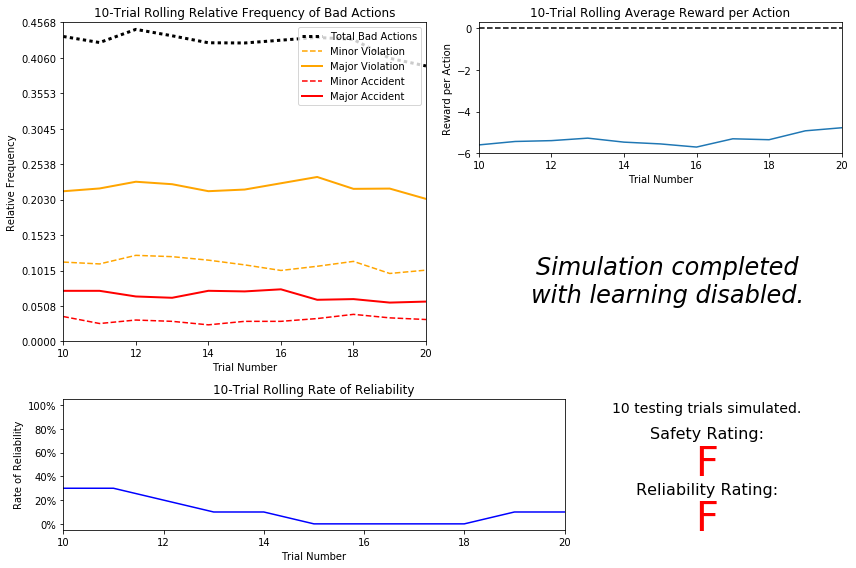

In [12]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- About 0.45 is the frequently of the bad decisions and over 0.05 for that dicisions make accidents.
- The reliability of the agent is about 30% which is very bad but comparing to the dicisions made randomly so is make sense.
- for the 20 trials the agent did the avarge is less than -4 which right because the dicision was bad.
- By the increasing of the trials the outcome from result did not changed because until now there is not any learning to the agent and decision came rendomly.
- Of course, the agent is not reliable or is safe for passangers and that because of its decisions made reandomly and there is not any mechanism to choose the better action in each move.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
- All that feature are rilated to the safety and efficiency, but to be specific, 'waypoint' and 'deadline' are rilated to the efficiency because the efficte on the time of reich the goal location. and the inputs {'light', 'left', 'right', 'oncoming'} are more rilated to the safety because is considring if there other cars in that location of next step.

- Those feature are appropriate for modeling the Smartcab in the enviroment because we need those to make decision about next action, and find the fast and best way to rich the goal location befor the end of the deadline. 
- In case we should choose some of that feature, I will choose to delete the 'waypoint' and 'deadline' because rish the gaol safety is important than the efficiency. Beside, the input reprisent the status of that time.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
- From the environment, the state spaece will be like this ('direction','is_red','left_available','right_available', 'oncoming_available','deadline') and the value of the 'direction' is 0-3 and each one of them rilated to on of (North,East,South,West), boolean values for the {'is_red','left_available','right_available', 'oncoming_available'} and int value for the 'deadline' for the remining time. 
- I think the number of possible state is 4\*2\*2\*2\*2 = 64 a small number for the status to the agent. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [34]:
%run  smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

Environment.reset(): Trial set up with start = (1, 3), destination = (7, 6), deadline = 25
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0.95
Environment.act() [POST]: location: (1, 3), heading: (0, -1), action: forward, reward: -10.6776239957
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': 'right'}, 'violation': 2, 'light': 'red', 'state': 'lrlrl', 'deadline': 25, 't': 0, 'action': 'forward', 'reward': -10.67762399574318, 'waypoint': 'left'}
Agent previous state: lrlrl
Agent attempted driving forward through a red light. (rewarded -10.68)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0.95
Environment.act() [POST]: location: (1, 3), heading: (0, -1), action: None, reward: 1.73690


/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
0.95
Environment.act() [POST]: location: (6, 3), heading: (0, -1), action: left, reward: -0.26778729164
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': 'fgNlf', 'deadline': 10, 't': 15, 'action': 'left', 'reward': -0.2677872916399182, 'waypoint': 'forward'}
Agent previous state: fgNlf
Agent drove left instead of forward. (rewarded -0.27)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
0.95
Environment.act() [POST]: location: (6, 3), heading: (0, -1), action: None, reward: 0.66645110589
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'left', 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': 'rrlrl', 'deadline': 9, 't': 16, 'action': None, 'reward': 0.6664511058


/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
0.9
Environment.act() [POST]: location: (3, 7), heading: (0, -1), action: forward, reward: 1.68468930538
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': 'lgNll', 'deadline': 26, 't': 4, 'action': 'forward', 'reward': 1.6846893053841079, 'waypoint': 'left'}
Agent previous state: lgNll
Agent drove forward instead of left. (rewarded 1.68)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0.9
Environment.act() [POST]: location: (3, 7), heading: (0, -1), action: None, reward: 2.0712534387
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrfNf', 'deadline': 25, 't': 5, 'action': None, 'reward': 2.0712534386998107, 


/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
0.9
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: right, reward: 0.998653011303
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgNNl', 'deadline': 11, 't': 19, 'action': 'right', 'reward': 0.9986530113026751, 'waypoint': 'forward'}
Agent previous state: fgNNl
Agent drove right instead of forward. (rewarded 1.00)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
0.9
Environment.act() [POST]: location: (2, 2), heading: (1, 0), action: right, reward: 1.10390122954
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrfNN', 'deadline': 10, 't': 20, 'action': 'right', 'reward': 1.10390122954446


/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
0.85
Environment.act() [POST]: location: (4, 5), heading: (-1, 0), action: left, reward: -10.6658999467
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'rrNNN', 'deadline': 22, 't': 3, 'action': 'left', 'reward': -10.66589994668653, 'waypoint': 'right'}
Agent previous state: rrNNN
Agent attempted driving left through a red light. (rewarded -10.67)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
0.85
Environment.act() [POST]: location: (4, 5), heading: (-1, 0), action: forward, reward: -10.7120385657
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'rrNNN', 'deadline': 21, 't': 4, 'action': 'forward', 'reward': -10.71203856568


/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
0.85
Environment.act() [POST]: location: (2, 6), heading: (-1, 0), action: right, reward: 1.08596918563
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrNNN', 'deadline': 7, 't': 18, 'action': 'right', 'reward': 1.0859691856334133, 'waypoint': 'right'}
Agent previous state: rrNNN
Agent followed the waypoint right. (rewarded 1.09)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
0.85
Environment.act() [POST]: location: (1, 6), heading: (-1, 0), action: forward, reward: 1.55930685697
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgfNN', 'deadline': 6, 't': 19, 'action': 'forward', 'reward': 1.5593068569707544,


/-------------------
| Step 7 Results
\-------------------

Environment.step(): t = 7
0.8
Environment.act() [POST]: location: (7, 3), heading: (1, 0), action: None, reward: 1.61172165939
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': 'frNlr', 'deadline': 18, 't': 7, 'action': None, 'reward': 1.6117216593915646, 'waypoint': 'forward'}
Agent previous state: frNlr
Agent properly idled at a red light. (rewarded 1.61)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Environment.step(): t = 8
0.8
Environment.act() [POST]: location: (7, 3), heading: (1, 0), action: forward, reward: -9.45183268691
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 2, 'light': 'red', 'state': 'frNNl', 'deadline': 17, 't': 8, 'action': 'forward', 'reward': -9.451832686908169, 'waypoin


/-------------------
| Step 22 Results
\-------------------

Environment.step(): t = 22
0.8
Environment.act() [POST]: location: (2, 6), heading: (0, 1), action: None, reward: -4.36835554429
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 1, 'light': 'green', 'state': 'rgNNN', 'deadline': 3, 't': 22, 'action': None, 'reward': -4.368355544287559, 'waypoint': 'right'}
Agent previous state: rgNNN
Agent idled at a green light with no oncoming traffic. (rewarded -4.37)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Environment.step(): t = 23
0.8
Environment.act() [POST]: location: (1, 6), heading: (-1, 0), action: right, reward: 0.754084780383
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rgrNf', 'deadline': 2, 't': 23, 'action': 'right', 'reward': 0


/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
0.75
Environment.act() [POST]: location: (8, 6), heading: (-1, 0), action: left, reward: -9.14224415299
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'frlNN', 'deadline': 18, 't': 12, 'action': 'left', 'reward': -9.142244152989907, 'waypoint': 'forward'}
Agent previous state: frlNN
Agent attempted driving left through a red light. (rewarded -9.14)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0.75
Environment.act() [POST]: location: (8, 5), heading: (0, -1), action: right, reward: 1.8088044313
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': 'fglff', 'deadline': 17, 't': 13, 'action': 'right', 'rewar


/-------------------
| Step 27 Results
\-------------------

Environment.step(): t = 27
0.75
Environment.act() [POST]: location: (3, 7), heading: (0, 1), action: forward, reward: -9.94531186969
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 2, 'light': 'red', 'state': 'rrNrN', 'deadline': 3, 't': 27, 'action': 'forward', 'reward': -9.945311869693654, 'waypoint': 'right'}
Agent previous state: rrNrN
Agent attempted driving forward through a red light. (rewarded -9.95)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Environment.step(): t = 28
0.75
Environment.act() [POST]: location: (2, 7), heading: (-1, 0), action: right, reward: 1.02196070266
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrNNN', 'deadline': 2, 't': 28, 'action': 'right', 'reward': 1.02196


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0.7
Environment.act() [POST]: location: (4, 3), heading: (-1, 0), action: left, reward: -10.5198163196
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'frlNN', 'deadline': 14, 't': 11, 'action': 'left', 'reward': -10.519816319587951, 'waypoint': 'forward'}
Agent previous state: frlNN
Agent attempted driving left through a red light. (rewarded -10.52)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
0.7
Environment.act() [POST]: location: (4, 3), heading: (-1, 0), action: forward, reward: -39.503648004
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': 'frlfN', 'deadline': 13, 't': 12, 'action': 'forward', 'reward': 

Agent previous state: rgNlN
Agent drove forward instead of right. (rewarded 1.61)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0.65
Environment.act() [POST]: location: (6, 6), heading: (-1, 0), action: None, reward: -5.36093259836
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 1, 'light': 'green', 'state': 'rgNfl', 'deadline': 19, 't': 1, 'action': None, 'reward': -5.360932598357397, 'waypoint': 'right'}
Agent previous state: rgNfl
Agent idled at a green light with no oncoming traffic. (rewarded -5.36)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
0.65
Environment.act() [POST]: location: (6, 7), heading: (0, 1), action: left, reward: 0.0579966160624
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'le


/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
0.65
Environment.act() [POST]: location: (5, 2), heading: (0, 1), action: None, reward: 2.0060526154
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrNNN', 'deadline': 4, 't': 16, 'action': None, 'reward': 2.0060526153972855, 'waypoint': 'left'}
Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 2.01)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
0.65
Environment.act() [POST]: location: (5, 3), heading: (0, 1), action: forward, reward: -0.408138767998
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': 'lgNll', 'deadline': 3, 't': 17, 'action': 'forward', 'reward': -0.4081387679976701, 'wa


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0.6
Environment.act() [POST]: location: (5, 7), heading: (0, -1), action: left, reward: -10.9556435761
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'rrfNN', 'deadline': 19, 't': 11, 'action': 'left', 'reward': -10.95564357612455, 'waypoint': 'right'}
Agent previous state: rrfNN
Agent attempted driving left through a red light. (rewarded -10.96)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
0.6
Environment.act() [POST]: location: (6, 7), heading: (1, 0), action: right, reward: 0.873303736514
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': 'right', 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrlNr', 'deadline': 18, 't': 12, 'action': 'right', 'reward': 0.8733


/-------------------
| Step 26 Results
\-------------------

Environment.step(): t = 26
0.6
Environment.act() [POST]: location: (6, 4), heading: (0, -1), action: forward, reward: -10.3494665606
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'rrfNN', 'deadline': 4, 't': 26, 'action': 'forward', 'reward': -10.349466560557481, 'waypoint': 'right'}
Agent previous state: rrfNN
Agent attempted driving forward through a red light. (rewarded -10.35)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Environment.step(): t = 27
0.6
Environment.act() [POST]: location: (7, 4), heading: (1, 0), action: right, reward: 1.34169798565
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrfNN', 'deadline': 3, 't': 27, 'action': 'right', 'reward':


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
0.55
Environment.act() [POST]: location: (6, 5), heading: (-1, 0), action: left, reward: -40.2795522163
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': 'frffN', 'deadline': 15, 't': 10, 'action': 'left', 'reward': -40.27955221632993, 'waypoint': 'forward'}
Agent previous state: frffN
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.28)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0.55
Environment.act() [POST]: location: (6, 5), heading: (-1, 0), action: forward, reward: -10.0748482318
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'frfNN', 'deadlin


Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 10
\-------------------------

Environment.reset(): Trial set up with start = (2, 6), destination = (7, 3), deadline = 30
Simulating trial. . . 
epsilon = 0.5000; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0.5
Environment.act() [POST]: location: (2, 6), heading: (0, 1), action: forward, reward: -39.48059123
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'forward', 'left': 'left'}, 'violation': 4, 'light': 'red', 'state': 'rrrlf', 'deadline': 30, 't': 0, 'action': 'forward', 'reward': -39.480591230015534, 'waypoint': 'right'}
Agent previous state: rrrlf
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.48)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0

Agent previous state: fgNlN
Agent drove left instead of forward. (rewarded 1.23)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
0.5
Environment.act() [POST]: location: (5, 5), heading: (0, -1), action: None, reward: 2.04967431389
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrlNN', 'deadline': 15, 't': 15, 'action': None, 'reward': 2.0496743138883424, 'waypoint': 'right'}
Agent previous state: rrlNN
Agent properly idled at a red light. (rewarded 2.05)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
0.5
Environment.act() [POST]: location: (5, 5), heading: (0, -1), action: None, reward: 1.2809657379
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation'


Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 11
\-------------------------

Environment.reset(): Trial set up with start = (8, 7), destination = (5, 4), deadline = 30
Simulating trial. . . 
epsilon = 0.4500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0.45
Environment.act() [POST]: location: (7, 7), heading: (-1, 0), action: right, reward: 2.83174380003
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrNNf', 'deadline': 30, 't': 0, 'action': 'right', 'reward': 2.831743800030564, 'waypoint': 'right'}
Agent previous state: rrNNf
Agent followed the waypoint right. (rewarded 2.83)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0.45
Environment.act() [POST]: location: (7, 6), heading: (0, -1), ac

Environment.act() [POST]: location: (1, 7), heading: (1, 0), action: None, reward: 1.83720667605
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'rrlNN', 'deadline': 16, 't': 14, 'action': None, 'reward': 1.8372066760480348, 'waypoint': 'right'}
Agent previous state: rrlNN
Agent properly idled at a red light. (rewarded 1.84)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
0.45
Environment.act() [POST]: location: (1, 7), heading: (1, 0), action: forward, reward: -10.2036730708
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 2, 'light': 'red', 'state': 'rrlNN', 'deadline': 15, 't': 15, 'action': 'forward', 'reward': -10.203673070783314, 'waypoint': 'right'}
Agent previous state: rrlNN
Agent attempted driving forward through a red lig

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 12
\-------------------------

Environment.reset(): Trial set up with start = (8, 6), destination = (2, 4), deadline = 20
Simulating trial. . . 
epsilon = 0.4000; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0.4
Environment.act() [POST]: location: (8, 6), heading: (1, 0), action: forward, reward: -10.4284177301
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': 'right', 'left': 'right'}, 'violation': 2, 'light': 'red', 'state': 'frfrr', 'deadline': 20, 't': 0, 'action': 'forward', 'reward': -10.428417730140264, 'waypoint': 'forward'}
Agent previous state: frfrr
Agent attempted driving forward through a red light. (rewarded -10.43)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0.4
Environment.act() [POST]: locatio


/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
0.4
Environment.act() [POST]: location: (7, 7), heading: (0, 1), action: forward, reward: 0.402858761987
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgNNN', 'deadline': 5, 't': 15, 'action': 'forward', 'reward': 0.4028587619866477, 'waypoint': 'left'}
Agent previous state: lgNNN
Agent drove forward instead of left. (rewarded 0.40)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Environment.step(): t = 16
0.4
Environment.act() [POST]: location: (7, 7), heading: (0, 1), action: right, reward: -19.5988540587
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': 'forward'}, 'violation': 3, 'light': 'red', 'state': 'lrNff', 'deadline': 4, 't': 16, 'action': 'right', 'reward': -19.59885405868

Agent previous state: rrlNN
Agent properly idled at a red light. (rewarded 1.81)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
0.35
Environment.act() [POST]: location: (1, 3), heading: (-1, 0), action: left, reward: 0.316198721266
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rglNN', 'deadline': 10, 't': 10, 'action': 'left', 'reward': 0.3161987212661611, 'waypoint': 'right'}
Agent previous state: rglNN
Agent drove left instead of right. (rewarded 0.32)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0.35
Environment.act() [POST]: location: (1, 3), heading: (-1, 0), action: right, reward: -19.0827219934
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'forward

Agent previous state: lrlNN
Agent attempted driving forward through a red light. (rewarded -9.94)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0.3
Environment.act() [POST]: location: (3, 4), heading: (0, 1), action: right, reward: 1.53198505732
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lglNN', 'deadline': 20, 't': 5, 'action': 'right', 'reward': 1.5319850573195528, 'waypoint': 'left'}
Agent previous state: lglNN
Agent drove right instead of left. (rewarded 1.53)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
0.3
Environment.act() [POST]: location: (2, 4), heading: (-1, 0), action: right, reward: 0.773896913417
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left':


/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
0.3
Environment.act() [POST]: location: (6, 2), heading: (0, -1), action: right, reward: 0.55889867015
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'red', 'state': 'frNlN', 'deadline': 5, 't': 20, 'action': 'right', 'reward': 0.5588986701504035, 'waypoint': 'forward'}
Agent previous state: frNlN
Agent drove right instead of forward. (rewarded 0.56)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
0.3
Environment.act() [POST]: location: (7, 2), heading: (1, 0), action: right, reward: 0.560811727057
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lglNN', 'deadline': 4, 't': 21, 'action': 'right', 'reward': 0.5608117270571239, '


/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
0.25
Environment.act() [POST]: location: (5, 3), heading: (1, 0), action: None, reward: 2.26745568731
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frNNN', 'deadline': 25, 't': 10, 'action': None, 'reward': 2.2674556873132565, 'waypoint': 'forward'}
Agent previous state: frNNN
Agent properly idled at a red light. (rewarded 2.27)
69% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0.25
Environment.act() [POST]: location: (6, 3), heading: (1, 0), action: forward, reward: 2.32264906833
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgNNN', 'deadline': 24, 't': 11, 'action': 'forward', 'reward': 2.3226490683303744, 'way


/-------------------
| Step 25 Results
\-------------------

Environment.step(): t = 25
0.25
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: left, reward: 1.05782147451
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgNNN', 'deadline': 10, 't': 25, 'action': 'left', 'reward': 1.0578214745066947, 'waypoint': 'left'}
Agent previous state: lgNNN
Agent followed the waypoint left. (rewarded 1.06)
26% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Environment.step(): t = 26
0.25
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (6, 2), heading: (0, -1), action: right, reward: 2.12468667031
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rgNNN', 'deadline': 9, 't': 26


/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0.2
Environment.act() [POST]: location: (4, 2), heading: (-1, 0), action: right, reward: 1.5909336026
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgNNf', 'deadline': 12, 't': 13, 'action': 'right', 'reward': 1.590933602603244, 'waypoint': 'left'}
Agent previous state: lgNNf
Agent drove right instead of left. (rewarded 1.59)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0.2
Environment.act() [POST]: location: (4, 7), heading: (0, -1), action: right, reward: 1.56099136394
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': 'fgNlf', 'deadline': 11, 't': 14, 'action': 'right', 'reward': 1.5609913639432

/-------------------
| Step 2 Results
\-------------------

Environment.step(): t = 2
0.15
Environment.act() [POST]: location: (7, 7), heading: (1, 0), action: forward, reward: -10.1014352784
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'right', 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': 'lrNlr', 'deadline': 18, 't': 2, 'action': 'forward', 'reward': -10.101435278392948, 'waypoint': 'left'}
Agent previous state: lrNlr
Agent attempted driving forward through a red light. (rewarded -10.10)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Environment.step(): t = 3
0.15
Environment.act() [POST]: location: (7, 2), heading: (0, 1), action: right, reward: 1.46312531336
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrNNl', 'deadline': 17, 't': 3, 'action': 'right', 'reward': 1.46312


/-------------------
| Step 17 Results
\-------------------

Environment.step(): t = 17
0.15
Environment.act() [POST]: location: (8, 6), heading: (0, -1), action: left, reward: 1.43970770234
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgNNN', 'deadline': 3, 't': 17, 'action': 'left', 'reward': 1.4397077023381246, 'waypoint': 'left'}
Agent previous state: lgNNN
Agent followed the waypoint left. (rewarded 1.44)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
0.15
Environment.act() [POST]: location: (1, 6), heading: (1, 0), action: right, reward: -0.0132269520488
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': 'forward'}, 'violation': 0, 'light': 'green', 'state': 'lgNfl', 'deadline': 2, 't': 18, 'action': 'right', 'reward': -0.0132269520487626


/-------------------
| Step 11 Results
\-------------------

Environment.step(): t = 11
0.1
Environment.act() [POST]: location: (7, 4), heading: (-1, 0), action: left, reward: 0.139889659773
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rglNN', 'deadline': 9, 't': 11, 'action': 'left', 'reward': 0.13988965977296086, 'waypoint': 'right'}
Agent previous state: rglNN
Agent drove left instead of right. (rewarded 0.14)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
0.1
Environment.act() [POST]: location: (7, 4), heading: (-1, 0), action: None, reward: -5.62415561336
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 1, 'light': 'green', 'state': 'rgfrN', 'deadline': 8, 't': 12, 'action': None, 'reward': -5.624155613361377,

/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0.05
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: forward, reward: 2.25531613015
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgNNN', 'deadline': 20, 't': 5, 'action': 'forward', 'reward': 2.255316130151777, 'waypoint': 'forward'}
Agent previous state: fgNNN
Agent followed the waypoint forward. (rewarded 2.26)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
0.05
Environment.act() [POST]: location: (6, 3), heading: (-1, 0), action: forward, reward: -10.2206895352
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 2, 'light': 'red', 'state': 'lrNrN', 'deadline': 19, 't': 6, 'action': 'forward', 'reward': -10.22068953519803


/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
0.05
Environment.act() [POST]: location: (8, 4), heading: (-1, 0), action: forward, reward: -10.8578935139
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'left', 'left': None}, 'violation': 2, 'light': 'red', 'state': 'frrNl', 'deadline': 5, 't': 20, 'action': 'forward', 'reward': -10.857893513885555, 'waypoint': 'forward'}
Agent previous state: frrNl
Agent attempted driving forward through a red light. (rewarded -10.86)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
0.05
Environment.act() [POST]: location: (7, 4), heading: (-1, 0), action: forward, reward: 0.625025458881
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgfNN', 'deadline': 4, 't': 21, 'action': 'forwa


/-------------------
| Step 9 Results
\-------------------

Environment.step(): t = 9
-3.1918911958e-16
Environment.act() [POST]: location: (5, 3), heading: (-1, 0), action: left, reward: 2.74838451766
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgNNN', 'deadline': 16, 't': 9, 'action': 'left', 'reward': 2.748384517655343, 'waypoint': 'left'}
Agent previous state: lgNNN
Agent followed the waypoint left. (rewarded 2.75)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Environment.step(): t = 10
-3.1918911958e-16
Environment.act() [POST]: location: (5, 2), heading: (0, -1), action: right, reward: 1.23594746689
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgNNf', 'deadline': 15, 't': 10, 'action': 'right', 'reward':


Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 2
\-------------------------

Environment.reset(): Trial set up with start = (3, 7), destination = (6, 5), deadline = 25
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0
Environment.act() [POST]: location: (3, 2), heading: (0, 1), action: right, reward: 1.41120419469
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'green', 'state': 'fgfrN', 'deadline': 25, 't': 0, 'action': 'right', 'reward': 1.4112041946937366, 'waypoint': 'forward'}
Agent previous state: fgfrN
Agent drove right instead of forward. (rewarded 1.41)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0
Environment.act() [POST]: location: (4, 2), heading: (1, 0), act


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0
Environment.act() [POST]: location: (4, 2), heading: (0, 1), action: right, reward: 0.819722509981
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frfNN', 'deadline': 11, 't': 14, 'action': 'right', 'reward': 0.8197225099811837, 'waypoint': 'forward'}
Agent previous state: frfNN
Agent drove right instead of forward. (rewarded 0.82)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
0
Environment.act() [POST]: location: (5, 2), heading: (1, 0), action: left, reward: 2.01194757709
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': 'left'}, 'violation': 0, 'light': 'green', 'state': 'lgNlN', 'deadline': 10, 't': 15, 'action': 'left', 'reward': 2.01194757709262, 'wayp


/-------------------
| Step 5 Results
\-------------------

Environment.step(): t = 5
0
Environment.act() [POST]: location: (8, 5), heading: (0, 1), action: None, reward: 1.865821062
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rglNl', 'deadline': 15, 't': 5, 'action': None, 'reward': 1.8658210619957274, 'waypoint': 'right'}
Agent previous state: rglNl
Agent idled at a green light with oncoming traffic. (rewarded 1.87)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Environment.step(): t = 6
0
Environment.act() [POST]: location: (8, 5), heading: (0, 1), action: None, reward: 0.296056851203
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rglNl', 'deadline': 14, 't': 6, 'action': None, 'reward': 0.2960568512025543, 

Agent previous state: rglNN
Agent drove left instead of right. (rewarded -0.83)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 4
\-------------------------

Environment.reset(): Trial set up with start = (6, 6), destination = (3, 3), deadline = 30
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0
Environment.act() [POST]: location: (6, 6), heading: (1, 0), action: forward, reward: -9.55575931709
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'left'}, 'violation': 2, 'light': 'red', 'state': 'rrflN', 'deadline': 30, 't': 0, 'action': 'forward', 'reward': -9.555759317094864, 'waypoint': 'right'}
Agent previous state: rrflN
Agent attempted driving forward through a red light. (rewarded -9.56)
97% of time remaining to reach destination.

/----------


/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0
Environment.act() [POST]: location: (5, 5), heading: (0, -1), action: forward, reward: -40.8058493286
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': None, 'left': 'forward'}, 'violation': 4, 'light': 'red', 'state': 'lrrfN', 'deadline': 16, 't': 14, 'action': 'forward', 'reward': -40.80584932864818, 'waypoint': 'left'}
Agent previous state: lrrfN
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.81)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Environment.step(): t = 15
0
Environment.act() [POST]: location: (5, 5), heading: (0, -1), action: None, reward: 1.7714901726
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrNNN', 'deadline': 15, 't':


/-------------------
| Step 29 Results
\-------------------

Environment.step(): t = 29
0
Environment.act() [POST]: location: (6, 3), heading: (1, 0), action: right, reward: -0.264089774664
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lgfNN', 'deadline': 1, 't': 29, 'action': 'right', 'reward': -0.2640897746643971, 'waypoint': 'left'}
Environment.step(): Primary agent ran out of time! Trial aborted.
Agent previous state: lgfNN
Agent drove right instead of left. (rewarded -0.26)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 5
\-------------------------

Environment.reset(): Trial set up with start = (2, 7), destination = (1, 4), deadline = 20
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0


Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 6
\-------------------------

Environment.reset(): Trial set up with start = (6, 5), destination = (4, 7), deadline = 20
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
0
Environment.act() [POST]: location: (6, 5), heading: (1, 0), action: forward, reward: -40.5604227542
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'right', 'right': 'forward', 'left': None}, 'violation': 4, 'light': 'red', 'state': 'rrrNf', 'deadline': 20, 't': 0, 'action': 'forward', 'reward': -40.56042275424141, 'waypoint': 'right'}
Agent previous state: rrrNf
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.56)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
0
Environme

| Step 3 Results
\-------------------

Environment.step(): t = 3
0
Environment.act() [POST]: location: (3, 6), heading: (0, 1), action: None, reward: 2.64465110358
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrfNN', 'deadline': 17, 't': 3, 'action': None, 'reward': 2.6446511035810816, 'waypoint': 'left'}
Agent previous state: lrfNN
Agent properly idled at a red light. (rewarded 2.64)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
0
Environment.act() [POST]: location: (2, 6), heading: (-1, 0), action: right, reward: 0.58598738153
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'lrlNN', 'deadline': 16, 't': 4, 'action': 'right', 'reward': 0.5859873815298499, 'waypoint': 'left'}
Agent previous state:


/-------------------
| Step 18 Results
\-------------------

Environment.step(): t = 18
0
Environment.act() [POST]: location: (4, 2), heading: (0, 1), action: None, reward: 0.716152362946
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frNNN', 'deadline': 2, 't': 18, 'action': None, 'reward': 0.7161523629457343, 'waypoint': 'forward'}
Agent previous state: frNNN
Agent properly idled at a red light. (rewarded 0.72)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Environment.step(): t = 19
0
Environment.act() [POST]: location: (4, 2), heading: (0, 1), action: None, reward: 0.879886506244
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': 'forward', 'left': None}, 'violation': 0, 'light': 'red', 'state': 'frNNf', 'deadline': 1, 't': 19, 'action': None, 'reward': 0.879886506243809, 'waypoint': 'forwar


/-------------------
| Step 12 Results
\-------------------

Environment.step(): t = 12
0
Environment.act() [POST]: location: (7, 7), heading: (0, -1), action: forward, reward: -10.6363318203
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': 'right'}, 'violation': 2, 'light': 'red', 'state': 'frNrN', 'deadline': 23, 't': 12, 'action': 'forward', 'reward': -10.63633182026604, 'waypoint': 'forward'}
Agent previous state: frNrN
Agent attempted driving forward through a red light. (rewarded -10.64)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (7, 6), heading: (0, -1), action: forward, reward: 1.48024237656
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'fgNN

Agent previous state: fgNNf
Agent drove right instead of forward. (rewarded 0.91)
63% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Environment.step(): t = 13
0
Environment.act() [POST]: location: (7, 3), heading: (-1, 0), action: right, reward: 1.57774265801
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'lglNN', 'deadline': 22, 't': 13, 'action': 'right', 'reward': 1.5777426580147873, 'waypoint': 'left'}
Agent previous state: lglNN
Agent drove right instead of left. (rewarded 1.58)
60% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Environment.step(): t = 14
0
Environment.act() [POST]: location: (7, 2), heading: (0, -1), action: right, reward: 2.6809740369
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation


/-------------------
| Step 28 Results
\-------------------

Environment.step(): t = 28
0
Environment.act() [POST]: location: (3, 2), heading: (0, 1), action: right, reward: 1.86556651097
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rgNNN', 'deadline': 7, 't': 28, 'action': 'right', 'reward': 1.8655665109683386, 'waypoint': 'right'}
Agent previous state: rgNNN
Agent followed the waypoint right. (rewarded 1.87)
17% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Environment.step(): t = 29
0
Environment.act() [POST]: location: (4, 2), heading: (1, 0), action: left, reward: 1.3606721537
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': 'left', 'left': None}, 'violation': 0, 'light': 'green', 'state': 'rgNNl', 'deadline': 6, 't': 29, 'action': 'left', 'reward': 1.3606721536982698, 'waypoint': '

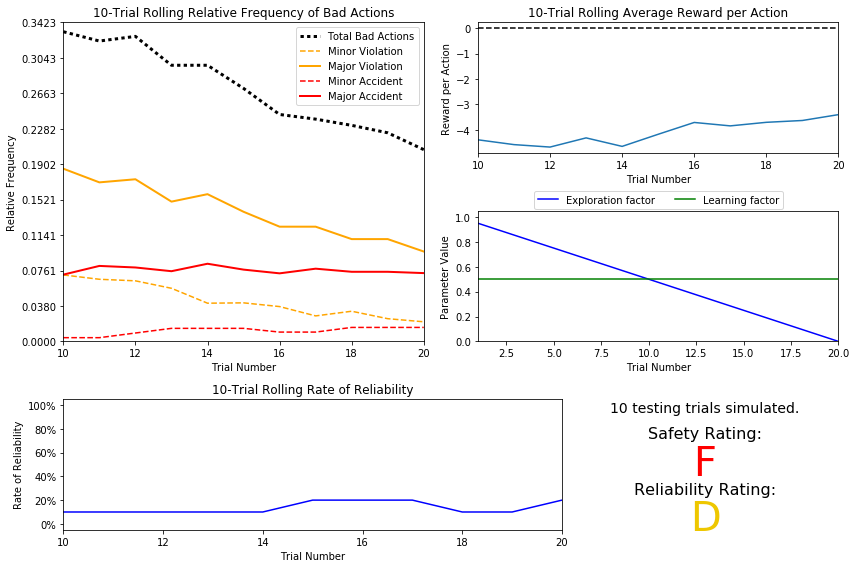

In [35]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- Firstly, we still have the same number of Accident like the "major Accident" is stay in same amount between 0.04 and 0.1.
- The number of traning the agent is 20 time. Comper that to the epsilon value wich started at 1 and end at -3.1918911958e-16 which is very close to the Zero.
- Yes, the decaying function work and the exploration factor 
- Of course by the time of training the bad actions decrease the frequency of them from to 0.438 to 0.2, and the avarge of the reward incresed from about -5.5 to about -2.
- The Safty rating is F and Reliability rating D.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [67]:
%run  smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

test Epsilon0.5
Simulating trial. . . 
epsilon = 1.0000; alpha = 0.6550

/-------------------
| Step 0 Results
\-------------------

Agent previous state: fglrf
Agent drove right instead of forward. (rewarded 0.08)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: lgNff
Agent drove forward instead of left. (rewarded 0.77)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: lgNlN
Agent drove right instead of left. (rewarded 0.97)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: frNNN
Agent drove right instead of forward. (rewarded 0.87)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: lrNff
Agent attempted driv


/-------------------
| Step 17 Results
\-------------------

Agent previous state: lgrNl
Agent idled at a green light with no oncoming traffic. (rewarded -4.93)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: lgNll
Agent drove forward instead of left. (rewarded 0.34)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: lgrNl
Agent drove forward instead of left. (rewarded 1.60)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: lrNNf
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.25)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: lgNNN
Agent drove forward instead of left. (rewarded 0.83)
27% of time remaining to reach d


/-------------------
| Step 5 Results
\-------------------

Agent previous state: fglrN
Agent followed the waypoint forward. (rewarded 2.33)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: fgNNN
Agent drove right instead of forward. (rewarded 1.20)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: lgNfN
Agent drove forward instead of left. (rewarded 0.22)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: lrffN
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.04)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: lgfNN
Agent drove right instead of left. (rewarded 0.95)
67% of time remaining to reach destination.

/-----------


/-------------------
| Step 20 Results
\-------------------

Agent previous state: fgNNN
Agent drove right instead of forward. (rewarded 0.16)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: lgfNN
Agent drove right instead of left. (rewarded 0.28)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: lrNNl
Agent attempted driving left through a red light. (rewarded -10.45)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: lrfNN
Agent attempted driving forward through a red light. (rewarded -10.34)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: lrlfN
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.66)
17% of time remaini


/-------------------
| Step 10 Results
\-------------------

Agent previous state: rrNNN
Agent properly idled at a red light. (rewarded 0.96)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: rgNNN
Agent drove left instead of right. (rewarded 0.90)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: lgNfN
Agent drove forward instead of left. (rewarded 1.73)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 2.18)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: lrNfN
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.70)
40% of time remaining to reach destination.

/-------


/-------------------
| Step 2 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 1.60)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 1.31)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 1.24)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: lglNN
Agent drove right instead of left. (rewarded 0.54)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: lglNN
Agent drove right instead of left. (rewarded 1.67)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previou

Agent reached the destination.

/-------------------------
| Training trial 11
\-------------------------

test Epsilon0.0221907356532
Simulating trial. . . 
epsilon = 0.0145; alpha = 0.6550

/-------------------
| Step 0 Results
\-------------------

Agent previous state: lgNNN
Agent drove forward instead of left. (rewarded 1.55)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: fgNNN
Agent drove right instead of forward. (rewarded 0.19)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: lgNll
Agent drove forward instead of left. (rewarded 1.92)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: lgNll
Agent drove forward instead of left. (rewarded 0.38)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Age


/-------------------
| Step 17 Results
\-------------------

Agent previous state: rrNfN
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.13)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: rrNNl
Agent attempted driving forward through a red light. (rewarded -9.56)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: rgNNN
Agent drove left instead of right. (rewarded 1.10)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: frNNN
Agent properly idled at a red light. (rewarded 0.69)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: frNNN
Agent properly idled at a red light. (rewarded 1.40)
27% of time remaining to reach desti

60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: frNNf
Agent properly idled at a red light. (rewarded 2.33)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: fgNlN
Agent followed the waypoint forward. (rewarded 2.15)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: frllN
Agent attempted driving forward through a red light. (rewarded -10.29)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: frlNN
Agent drove right instead of forward. (rewarded 0.45)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: lrNfl
Agent properly idled at a red light. (rewarded 1.19)
40% of time remaining to reach destination.

/


/-------------------
| Step 2 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 1.27)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 1.32)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 2.39)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: lglfl
Agent drove forward instead of left. (rewarded 0.54)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: lgllr
Agent drove forward instead of left. (rewarded 0.05)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent pre


/-------------------
| Step 4 Results
\-------------------

Agent previous state: lgNNN
Agent drove forward instead of left. (rewarded 0.96)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: lglNN
Agent drove right instead of left. (rewarded 1.36)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: rrlNr
Agent followed the waypoint right. (rewarded 1.64)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: rgNNN
Agent drove left instead of right. (rewarded 1.03)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: rrrlN
Agent attempted driving forward through a red light. (rewarded -10.70)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\------------------

Agent previous state: lrlNN
Agent properly idled at a red light. (rewarded 1.04)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: lrlNN
Agent properly idled at a red light. (rewarded 0.47)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: lrlNN
Agent properly idled at a red light. (rewarded 0.75)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: lglNN
Agent drove right instead of left. (rewarded -0.55)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 20
\-------------------------

test Epsilon0.00049242874883
Simulating trial. . . 
epsilon = 0.0003; alpha = 0.6550

/-------------------
| Step 0 Results
\-------------------

Agent previous state: lgrNN
Agent drove for


/-------------------
| Step 12 Results
\-------------------

Agent previous state: fgNNN
Agent drove right instead of forward. (rewarded 1.81)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: lrNfr
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.91)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: lrlNf
Agent drove right instead of left. (rewarded 0.73)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: fglll
Agent followed the waypoint forward. (rewarded 2.31)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: frNfN
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.98)
43% of time r

Agent previous state: fgfNf
Agent drove right instead of forward. (rewarded -0.48)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 3
\-------------------------

test Epsilon0
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: fgNNf
Agent followed the waypoint forward. (rewarded 1.30)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: fgfNN
Agent followed the waypoint forward. (rewarded 1.71)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: fgNfN
Agent drove right instead of forward. (rewarded 1.82)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: lrfrN
Agent drove right instead of 


/-------------------
| Step 17 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 2.65)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: lrNNN
Agent properly idled at a red light. (rewarded 2.27)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: lgNNN
Agent drove forward instead of left. (rewarded 0.76)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: fgfNf
Agent drove right instead of forward. (rewarded 0.94)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: lrNlN
Agent drove right instead of left. (rewarded 0.04)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agen


/-------------------
| Step 4 Results
\-------------------

Agent previous state: frlNN
Agent drove right instead of forward. (rewarded 1.69)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: lgrfl
Agent drove forward instead of left. (rewarded 1.70)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: lrrNN
Agent properly idled at a red light. (rewarded 2.40)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: lgNNN
Agent drove forward instead of left. (rewarded 1.06)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: lgNrf
Agent drove forward instead of left. (rewarded 0.93)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent pr

Agent previous state: lrNrN
Agent drove right instead of left. (rewarded 1.22)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: rglll
Agent drove forward instead of right. (rewarded 1.47)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: frNNl
Agent drove right instead of forward. (rewarded 1.69)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: lgNfN
Agent drove forward instead of left. (rewarded 0.05)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: lgNff
Agent drove right instead of left. (rewarded 0.48)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: frNNN
Agent properly idled at a red light. (reward


/-------------------
| Step 8 Results
\-------------------

Agent previous state: rrfNN
Agent followed the waypoint right. (rewarded 1.28)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: frNNN
Agent properly idled at a red light. (rewarded 2.26)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: frNNf
Agent properly idled at a red light. (rewarded 2.58)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: frNfl
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.60)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: frNlN
Agent drove right instead of forward. (rewarded 0.66)
48% of time remaining to reach destination.

/--------

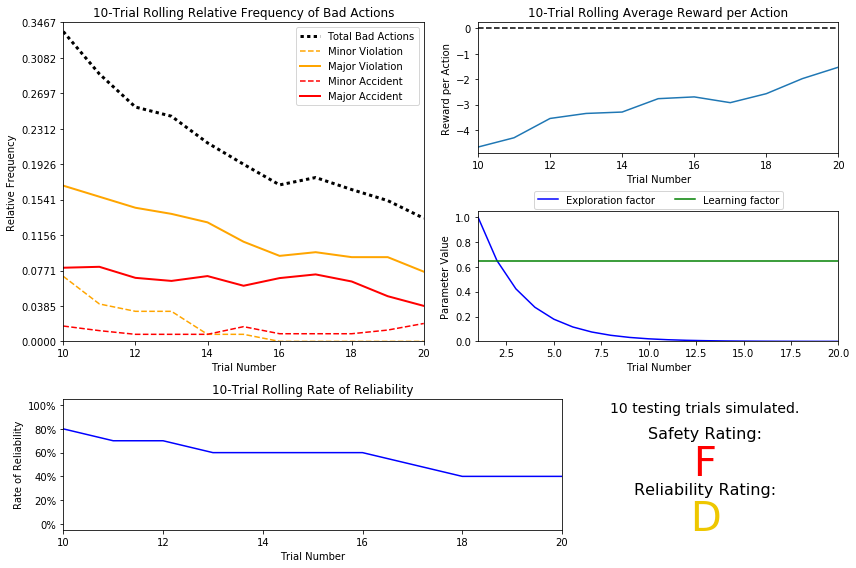

In [50]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- I tried all the optinal function but I got the best result from this function $$ \epsilon = a^t, \textrm{for } 0 < a < 1 $$ 
- I used the same amount of trials for privece testing which is 20 for learning and 10 for testing.
- The learning start with 0.8 for epsilon and 0.65 for alpha.
- The result is incremtal changed from the last section like the total bad action at the end  is 0.1156 and reliability is between 80% to 60%.
- The agent started to learn from because the bad action is redused so it get benifit from the policyes.
- No, I think should the rating be better but I tried so many times and I changed the value of alpha without any prograssied.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
In this states the which the id represent (waypoint, light, oncoming, left, right) so the first letter is waypoint and the value is forward beside that forward is the highiest value which is rghit.
fgNrf
 -- forward : 0.39
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00

fgfrl
 -- forward : 1.47
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00

And in this case which is diffrent from the status we could find the light is green and shoud go forward but the best action is None

fglNr
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.18
 -- left : 0.00


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
the environment characteristics is the dummies which is randomly moving and that changing the future reward.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.